## Multi-fidelity Bayesian Optimization

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math

import pandas as pd
import torch

def test_function(input_dict):
    x = input_dict["x"]
    s = input_dict["s"]
    return {"f":np.sin(x) * np.exp((-s+1)/2)}


# define vocs
from xopt import VOCS
vocs = VOCS(
    variables={
        "x": [0, 2*math.pi],
    },
    objectives={"f": "MINIMIZE"},
)

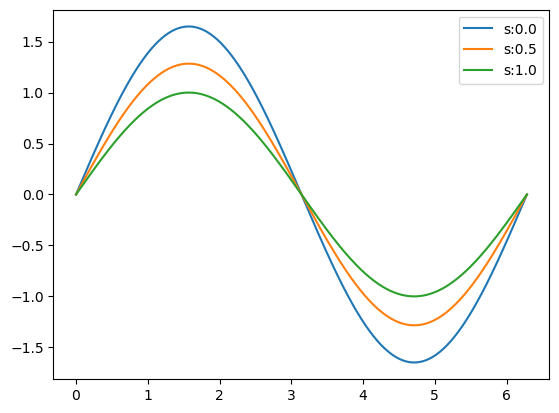

In [8]:
# plot the test function in input + fidelity space
test_x = np.linspace(*vocs.bounds, 1000)
fidelities = [0.0,0.5,1.0]

fig,ax = plt.subplots()
for ele in fidelities:
    f = test_function({"x":test_x, "s":ele})["f"]
    ax.plot(test_x, f,label=f"s:{ele}")

ax.legend()

In [9]:
# create xopt object
from xopt.generators import MultiFidelityBayesianGenerator
from xopt import Evaluator, Xopt

# get and modify default generator options
options = MultiFidelityBayesianGenerator.default_options()

# set the base cost of evaluating the function
options.acq.fixed_cost = 0.1
options.acq.fidelities = [0.0,0.5,1.0]

generator = MultiFidelityBayesianGenerator(vocs, options=options)
evaluator = Evaluator(function=test_function)

X = Xopt(vocs=vocs, generator=generator, evaluator=evaluator)
X.generator.options

MultiFidelityOptions(optim=OptimOptions(num_restarts=20, raw_samples=20, sequential=True, max_travel_distances=None, use_turbo=False), acq=MultiFidelityAcqOptions(proximal_lengthscales=None, use_transformed_proximal_weights=True, monte_carlo_samples=128, fidelities=[0.0, 0.5, 1.0], n_fantasies=128, fixed_cost=0.1), model=MultiFidelityModelOptions(name='multi_fidelity', custom_constructor=None, use_low_noise_prior=True, covar_modules={}, mean_modules={}, fidelity_parameter='s'), n_initial=3, use_cuda=False)

In [10]:
# evaluate initial points at mixed fidelities to seed optimization
X.evaluate_data(pd.DataFrame({"x":[math.pi / 4, math.pi / 2.],"s":[0.0, 0.5]}))

,x,s,f,xopt_runtime,xopt_error
1,0.785398,0.0,1.165822,0.000015,False
2,1.570796,0.5,1.284025,0.000005,False


In [11]:
# get the total cost of previous observations (base_cost + s for each measurement)
X.generator.calculate_total_cost()

0.7

In [12]:
# run optimization until the cost budget is exhausted
budget = 10
while X.generator.calculate_total_cost() < budget:
    print(f"budget used: {X.generator.calculate_total_cost()}")
    X.step()

budget used: 0.7
budget used: 0.8
budget used: 0.9
budget used: 1.0
budget used: 1.1
budget used: 1.7000000000000002
budget used: 1.8
budget used: 2.4
budget used: 3.5
budget used: 4.6
budget used: 5.2
budget used: 6.3
budget used: 6.4
budget used: 7.5
budget used: 8.6
budget used: 8.7
budget used: 9.8


In [13]:
X.data

,x,s,f,xopt_runtime,xopt_error
1,0.785398,0.0,1.165822e+00,0.000015,False
2,1.570796,0.5,1.284025e+00,0.000005,False
3,4.321459,0.0,-1.524333e+00,0.000010,False
4,0.304558,0.0,4.944041e-01,0.000009,False
5,1.976800,0.0,1.514691e+00,0.000011,False
6,2.159253,0.0,1.371403e+00,0.000009,False
7,1.848431,0.5,1.234855e+00,0.000009,False
8,6.168483,0.0,-1.886980e-01,0.000011,False
9,4.301922,0.5,-1.177367e+00,0.000009,False
10,6.283185,1.0,-2.449294e-16,0.000009,False
